In [5]:
import pandas as pd

df = pd.read_csv('merged_checked.csv')

# Convert column to datetime type
df['Q2.9.2'] = pd.to_datetime(df['Q2.9.2'])


df.head()

,id,title,label,annotator,Q1.1,Q1.2,Q1.3.1,Q1.4,Q1.5,Q1.6,...,Q1.7.1_3,Q1.7.1_4,Q1.7.1_5,Q1.7.1_6,Q1.7.1_7,Q1.7.1_8,Q1.7.1_9,Q1.7.1_10,Q1.7.1_11,Q1.7.1_12
0,18d71db7-f362-46fa-953e-d8353c7f7232,Coronavirus| nuove regole: al tavolo al ristor...,Group 2,Manuel,1,2,-1,2,4,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,18d71db7-f362-46fa-953e-d8353c7f7232,Coronavirus| nuove regole: al tavolo al ristor...,Group 2,Marinella,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,18d71db7-f362-46fa-953e-d8353c7f7232,Coronavirus| nuove regole: al tavolo al ristor...,Group 2,Angelo,1,3,1,1,4,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,3ca70f03-38f3-4a7b-bdd3-f012b22e0c7e,Israele: Lapid| ostacoli ma fiducioso su nuovo...,Group 2,Manuel,1,4,-1,2,4,4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,3ca70f03-38f3-4a7b-bdd3-f012b22e0c7e,Israele: Lapid| ostacoli ma fiducioso su nuovo...,Group 2,Marinella,1,4,-1,1,4,4,...,-1,-1,-1,-1,-1,-1,-1,-1,1,-1


In [6]:
df.dtypes


id                   object
title                object
label                object
annotator            object
Q1.1                  int64
Q1.2                  int64
Q1.3.1                int64
Q1.4                  int64
Q1.5                  int64
Q1.6                  int64
Q1.7                  int64
Q1.7.1.2             object
Q2.8                  int64
Q2.9.1                int64
Q2.9.2       datetime64[ns]
Q2.10                 int64
Q1.3_1                int64
Q1.3_2                int64
Q1.3_3                int64
Q1.3_4                int64
Q1.3_5                int64
Q1.3_6                int64
Q1.3_7                int64
Q1.3_8                int64
Q1.3_9                int64
Q1.7.1_0              int64
Q1.7.1_1              int64
Q1.7.1_2              int64
Q1.7.1_3              int64
Q1.7.1_4              int64
Q1.7.1_5              int64
Q1.7.1_6              int64
Q1.7.1_7              int64
Q1.7.1_8              int64
Q1.7.1_9              int64
Q1.7.1_10           

# Comparison

In [8]:
# Per ciascun articolo condiviso, calcola il coefficiente Kappa di Cohen
def getKappa (annotator_1, annotator_2):
# Inizializza una lista per memorizzare i coefficienti Kappa di Cohen
    kappa_scores = []

    articles = set(df[df['annotator'] == annotator_1]['id']).intersection(
    set(df[df['annotator'] == annotator_2]['id']))
    for article_id in articles:
        annotator1 = df[(df['id'] == article_id) & (df['annotator'] == annotator_1)][['Q1.1', 'Q1.2', 'Q1.3.1', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7', 'Q2.8', 'Q2.9.1', 'Q2.10', 'Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9', 'Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12']]
        annotator2 = df[(df['id'] == article_id) & (df['annotator'] == annotator_2)][['Q1.1', 'Q1.2', 'Q1.3.1', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7', 'Q2.8', 'Q2.9.1', 'Q2.10', 'Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9', 'Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12']]

        # Somma i valori delle colonne 'Q1.3_1' a 'Q1.3_9' per ciascun annotatore
        annotator1['Q1.3'] = annotator1[['Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9']].sum(axis=1)
        annotator2['Q1.3'] = annotator2[['Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9']].sum(axis=1)

        # Somma i valori delle colonne 'Q1.7.1_0' a 'Q1.7.1_12' per ciascun annotatore
        annotator1['Q1.7'] = annotator1[['Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12']].sum(axis=1)
        annotator2['Q1.7'] = annotator2[['Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12']].sum(axis=1)

        
        # Rimuovi le colonne 'Q1.3_1' a 'Q1.3_9'
        annotator1 = annotator1.drop(columns=['Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9'])
        annotator2 = annotator2.drop(columns=['Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9'])

        # Rimuovi le colonne 'Q1.7.1_0' a 'Q1.7.1_12'
        annotator1 = annotator1.drop(columns=['Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12'])
        annotator2 = annotator2.drop(columns=['Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12'])


        # Converti i valori in numeri interi o float
        annotator1 = annotator1.astype(float)
        annotator2 = annotator2.astype(float)
        
        # Calcola il coefficiente Kappa di Cohen per ciascuna coppia di annotatori
        k = cohen_kappa_score(annotator1.values.flatten(), annotator2.values.flatten())
        kappa_scores.append(k)
    if (len(kappa_scores) > 0):
        mean_kappa = sum(kappa_scores) / len(kappa_scores)
    else:
        print('Non ci sono annotazioni in comune tra gli annotatori ' + str(annotator_1) + ' e ' + str(annotator_1))
        return ()
    print ('Il K tra ' + str(annotator_1) +' e ' + str(annotator_2) +' è  di: '  + str(mean_kappa))
    return mean_kappa

out = getKappa('Manuel', 'Angelo')
out = getKappa('Manuel', 'Marinella')
out = getKappa('Angelo', 'Marinella')
print ('------------------------------------------')
out = getKappa('ChatGPT4AsAnnotator', 'Marinella')
out = getKappa('ChatGPT4AsAnnotator', 'Angelo')
out = getKappa('ChatGPT4AsAnnotator', 'Manuel')

Il K tra Manuel e Angelo è  di: 0.7349834518643251
Il K tra Manuel e Marinella è  di: 0.7266702835576679
Il K tra Angelo e Marinella è  di: 0.7214728922836694
------------------------------------------
Il K tra ChatGPT4AsAnnotator e Marinella è  di: 0.37583445555733924
Il K tra ChatGPT4AsAnnotator e Angelo è  di: 0.38571356484787367
Il K tra ChatGPT4AsAnnotator e Manuel è  di: 0.3865358494398851


In [9]:
def calculate_metrics_sklearn(annotator_1, annotator_2):
    y_true = []
    y_pred = []

    articles = set(df[df['annotator'] == annotator_1]['id']).intersection(
    set(df[df['annotator'] == annotator_2]['id']))
    
    for article_id in articles:
        annotator1 = df[(df['id'] == article_id) & (df['annotator'] == annotator_1)][['Q1.1', 'Q1.2', 'Q1.3.1', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7', 'Q2.8', 'Q2.9.1', 'Q2.10', 'Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9', 'Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12']]
        annotator2 = df[(df['id'] == article_id) & (df['annotator'] == annotator_2)][['Q1.1', 'Q1.2', 'Q1.3.1', 'Q1.4', 'Q1.5', 'Q1.6', 'Q1.7', 'Q2.8', 'Q2.9.1', 'Q2.10', 'Q1.3_1', 'Q1.3_2', 'Q1.3_3', 'Q1.3_4', 'Q1.3_5', 'Q1.3_6', 'Q1.3_7', 'Q1.3_8', 'Q1.3_9', 'Q1.7.1_0', 'Q1.7.1_1', 'Q1.7.1_2', 'Q1.7.1_3', 'Q1.7.1_4', 'Q1.7.1_5', 'Q1.7.1_6', 'Q1.7.1_7', 'Q1.7.1_8', 'Q1.7.1_9', 'Q1.7.1_10', 'Q1.7.1_11', 'Q1.7.1_12']]
        
        annotator1 = annotator1.astype(str)
        annotator2 = annotator2.astype(str)
        
        for col in annotator1.columns:
            annotations_1 = annotator1[col].values.flatten()
            annotations_2 = annotator2[col].values.flatten()
            for ann_1, ann_2 in zip(annotations_1, annotations_2):
                y_true.append(ann_1)
                y_pred.append(ann_2)

    print('Le statistiche tra ' + str(annotator_1) + ' e ' + str(annotator_2) + ' sono: ')

    print('Accuracy: ' + str(accuracy_score(y_true, y_pred)))
    print('Precision micro: ' + str(precision_score(y_true, y_pred, average='micro', zero_division=0)))
    print('Precision macro: ' + str(precision_score(y_true, y_pred, average='macro', zero_division=0)))
    print('Precision weighted: ' + str(precision_score(y_true, y_pred, average='weighted', zero_division=0)))

    print('Recall micro: ' + str(recall_score(y_true, y_pred, average='micro', zero_division=0)))
    print('Recall macro: ' + str(recall_score(y_true, y_pred, average='macro', zero_division=0)))
    print('Recall weighted: ' + str(recall_score(y_true, y_pred, average='weighted', zero_division=0)))

    print('F1 micro: ' + str(f1_score(y_true, y_pred, average='micro', zero_division=0)))
    print('F1 macro: ' + str(f1_score(y_true, y_pred, average='macro', zero_division=0)))
    print('F1 weighted: ' + str(f1_score(y_true, y_pred, average='weighted', zero_division=0)))
    print('\n')
    return (0)

calculate_metrics_sklearn('Manuel','ChatGPT4AsAnnotator')
calculate_metrics_sklearn('Angelo','ChatGPT4AsAnnotator')
calculate_metrics_sklearn('Marinella','ChatGPT4AsAnnotator')


Le statistiche tra Manuel e ChatGPT4AsAnnotator sono: 
Accuracy: 0.7821428571428571
Precision micro: 0.7821428571428571
Precision macro: 0.6773759505501231
Precision weighted: 0.7961224528524641
Recall micro: 0.7821428571428571
Recall macro: 0.5769549508327086
Recall weighted: 0.7821428571428571
F1 micro: 0.7821428571428571
F1 macro: 0.5578937694257055
F1 weighted: 0.7569880300685733


Le statistiche tra Angelo e ChatGPT4AsAnnotator sono: 
Accuracy: 0.78125
Precision micro: 0.78125
Precision macro: 0.5212510350804382
Precision weighted: 0.7941240567322313
Recall micro: 0.78125
Recall macro: 0.5293510217852323
Recall weighted: 0.78125
F1 micro: 0.78125
F1 macro: 0.4874086436229031
F1 weighted: 0.7556467066982613


Le statistiche tra Marinella e ChatGPT4AsAnnotator sono: 
Accuracy: 0.7824074074074074
Precision micro: 0.7824074074074074
Precision macro: 0.5190719790706974
Precision weighted: 0.8017033157708787
Recall micro: 0.7824074074074074
Recall macro: 0.5172102443382297
Recall weight

0

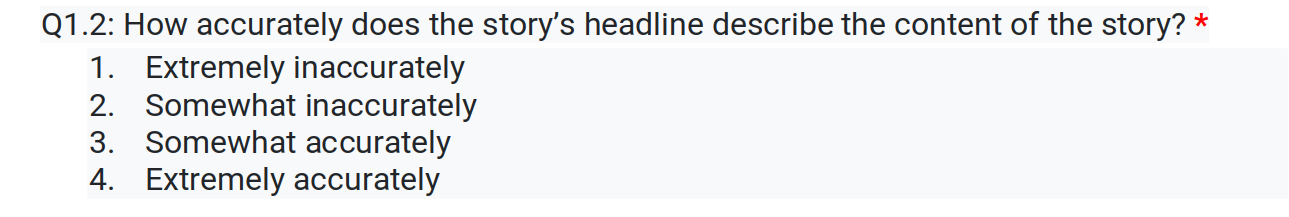

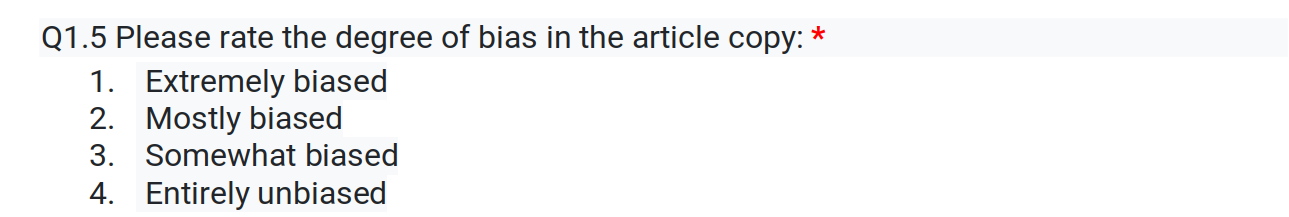

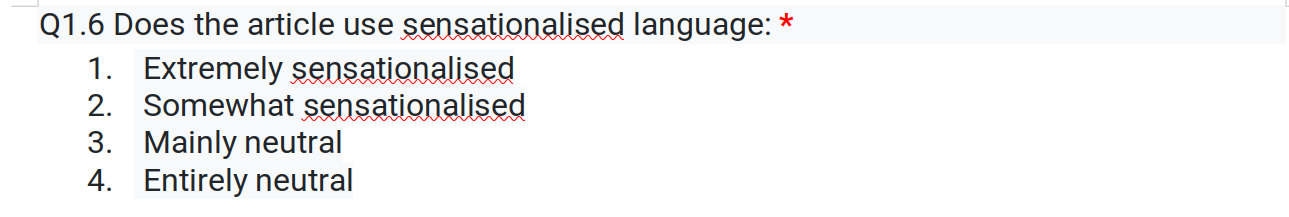

Manuel VS ChatGPT4AsAnnotator


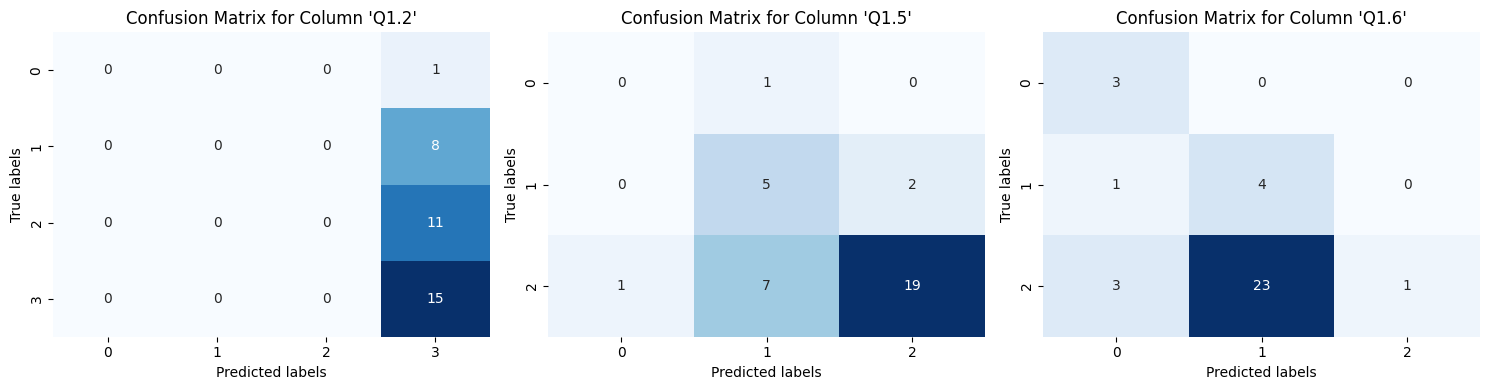

Angelo VS ChatGPT4AsAnnotator


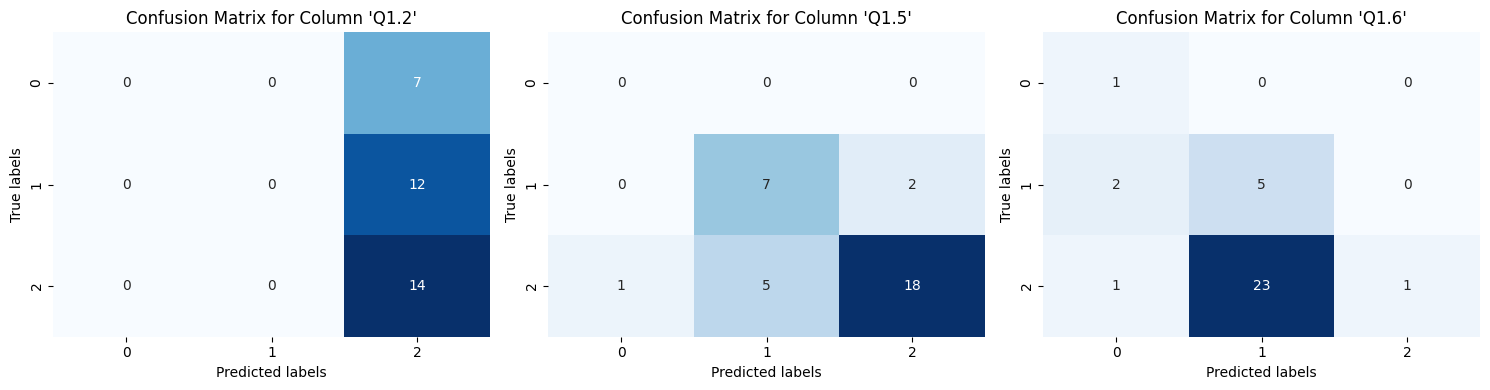

Marinella VS ChatGPT4AsAnnotator


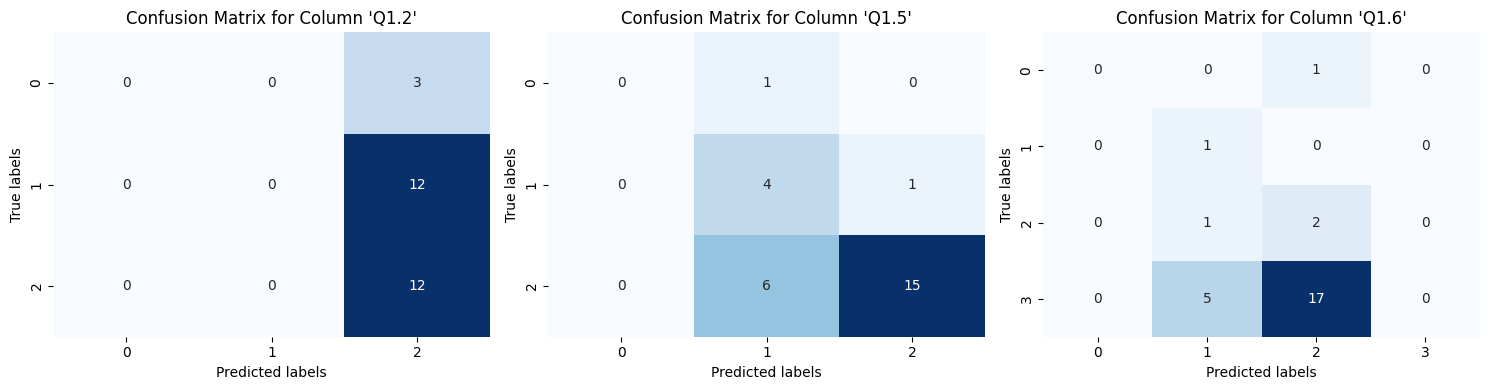

In [10]:
def calculate_confusion_matrix(annotator_1, annotator_2, columns):
    confusion_matrices = {}
    
    for column in columns:
        y_true = []
        y_pred = []

        articles = set(df[df['annotator'] == annotator_1]['id']).intersection(
            set(df[df['annotator'] == annotator_2]['id']))

        for article_id in articles:
            annotator1 = df[(df['id'] == article_id) & (df['annotator'] == annotator_1)][[column]]
            annotator2 = df[(df['id'] == article_id) & (df['annotator'] == annotator_2)][[column]]

            annotator1 = annotator1.astype(str)
            annotator2 = annotator2.astype(str)

            for col in annotator1.columns:
                annotations_1 = annotator1[col].values.flatten()
                annotations_2 = annotator2[col].values.flatten()
                for ann_1, ann_2 in zip(annotations_1, annotations_2):
                    y_true.append(ann_1)
                    y_pred.append(ann_2)

        confusion_matrices[column] = confusion_matrix(y_true, y_pred)
    plot_confusion_matrices(confusion_matrices)
    return 0

def plot_confusion_matrices(conf_matrices):
    num_cols = len(conf_matrices)
    fig, axes = plt.subplots(1, num_cols, figsize=(5*num_cols, 4))

    for i, (column, conf_matrix) in enumerate(conf_matrices.items()):
        sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False, ax=axes[i])
        axes[i].set_xlabel("Predicted labels")
        axes[i].set_ylabel("True labels")
        axes[i].set_title(f"Confusion Matrix for Column '{column}'")

    plt.tight_layout()
    plt.show()

columns_to_consider = ['Q1.2', 'Q1.5', 'Q1.6']
print('Manuel VS ChatGPT4AsAnnotator')
conf_matrices = calculate_confusion_matrix('Manuel','ChatGPT4AsAnnotator', columns_to_consider)
print('Angelo VS ChatGPT4AsAnnotator')
conf_matrices = calculate_confusion_matrix('Angelo','ChatGPT4AsAnnotator', columns_to_consider)
print('Marinella VS ChatGPT4AsAnnotator')
conf_matrices = calculate_confusion_matrix('Marinella','ChatGPT4AsAnnotator', columns_to_consider)